# **Universidad de Monterrey**
Emiliano Azael González Jiménez - 598366

Valeria Álvarez Treviño
### Ingeniería en Gestión Empresarial

Dr. José Daniel Morcillo Bastidas

San Pedro Garza García, N.L.

18 de mayo del 2025

## **Importación y limpieza de la base de datos**

In [43]:
#Instalar la librería
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [71]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [555]:
#Importar las librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [556]:
from google.colab import files
uploaded = files.upload()

In [557]:
#Cargamos los datos
df=pd.read_csv("parkinsons_disease_data.csv")
print(df.shape)
df.sample(5)

(2105, 35)


PatientID  Age  Gender  Ethnicity  EducationLevel   BMI  Smoking  \
1583       4641   63       0          2               0 16.41        1   
1631       4689   75       0          0               1 38.22        0   
117        3175   87       1          1               2 33.77        1   
795        3853   84       1          3               1 17.40        0   
929        3987   89       0          0               1 31.01        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
1583               15.19              5.83         8.28  ...   
1631               11.53              7.74         1.90  ...   
117                 5.83              5.31         1.75  ...   
795                 7.80              3.60         7.28  ...   
929                 4.66              0.05         9.82  ...   

      FunctionalAssessment  Tremor  Rigidity  Bradykinesia  \
1583                  0.17       0         0             0   
1631                  7.41       1         0             0   
117                   2.29       0         0             0   
795                   1.29       0         0             0   
929                   2.37       0         0             0   

      PosturalInstability  SpeechProblems  SleepDisorders  Constipation  \
1583                    0               0               0             0   
1631                    0               0               1             0   
117                     1               0               0             1   
795                     0               0               0             1   
929                     0               0               0             0   

      Diagnosis  DoctorInCharge  
1583          1     DrXXXConfid  
1631          1     DrXXXConfid  
117           1     DrXXXConfid  
795           0     DrXXXConfid  
929           1     DrXXXConfid  

[5 rows x 35 columns]

In [558]:
#Eliminamos las variables de ID y doctor a cargo ya que no son relevantes
df=df.drop(['PatientID', 'DoctorInCharge'], axis=1)
df.head()

Age  Gender  Ethnicity  EducationLevel   BMI  Smoking  AlcoholConsumption  \
0   85       0          3               1 19.62        0                5.11   
1   75       0          0               2 16.25        1                6.03   
2   70       1          0               0 15.37        0                2.24   
3   52       0          0               0 15.45        0                6.00   
4   87       0          0               1 18.62        0                9.78   

   PhysicalActivity  DietQuality  SleepQuality  ...  MoCA  \
0              1.38         3.89          9.28  ... 29.18   
1              8.41         8.51          5.60  ... 12.33   
2              0.21         6.50          9.93  ... 29.93   
3              1.38         6.72          4.20  ... 21.30   
4              1.19         4.66          9.36  ...  8.34   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0                  1.57       1         0             0                    0   
1                  4.79       0         1             0                    1   
2                  2.13       1         0             0                    0   
3                  3.39       1         1             1                    0   
4                  3.20       0         0             0                    1   

   SpeechProblems  SleepDisorders  Constipation  Diagnosis  
0               0               0             0          0  
1               0               1             0          1  
2               1               0             1          1  
3               0               0             1          1  
4               0               1             0          0  

[5 rows x 33 columns]

In [559]:
#Revisamos si hay datos vacíos
df.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int64

In [560]:
#Revisamos si hay duplicados
df.duplicated().sum()

0

Al no haber vacíos ni duplicados, no se necesita hacer la imputación de registros ni eliminar los duplicados, además, todas las variables ya son numéricas, por lo que ya se puede utilizar la base de datos.

## **FI vs PI**

In [561]:
#Importamos las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import shap

**Revisar correlación y desbalance**

In [562]:
#Medir el desbalance de clases
df['Diagnosis'].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

In [563]:
#Determinar si hay relación LINEAL entre las Xs y la "Y"
df.corr(numeric_only=True).sort_values('Diagnosis',ascending=False)

Age  Gender  Ethnicity  EducationLevel   BMI  \
Diagnosis                 0.07    0.02      -0.01            0.00  0.03   
UPDRS                     0.01    0.03      -0.00           -0.00  0.04   
Tremor                    0.03    0.02      -0.01           -0.00  0.00   
Rigidity                 -0.01    0.03      -0.03            0.01 -0.04   
Bradykinesia             -0.01   -0.02       0.03            0.01 -0.01   
PosturalInstability      -0.02   -0.02       0.03           -0.01  0.01   
Age                       1.00    0.01       0.02            0.02  0.04   
Depression               -0.02   -0.02       0.01            0.01 -0.04   
Diabetes                 -0.00   -0.03       0.08            0.04 -0.02   
AlcoholConsumption       -0.01   -0.02       0.02           -0.00  0.02   
BMI                       0.04    0.07      -0.00            0.01  1.00   
Stroke                   -0.03   -0.01      -0.02            0.02 -0.02   
Constipation             -0.03   -0.04      -0.01            0.01 -0.02   
TraumaticBrainInjury     -0.01   -0.02       0.00            0.06 -0.03   
Gender                    0.01    1.00      -0.02           -0.01  0.07   
CholesterolTriglycerides  0.01    0.04      -0.02           -0.01  0.03   
CholesterolLDL            0.04    0.03       0.01            0.00 -0.02   
FamilyHistoryParkinsons   0.01   -0.03       0.01            0.02  0.03   
PhysicalActivity          0.03   -0.00       0.01           -0.01 -0.00   
Smoking                  -0.01   -0.04       0.05           -0.01 -0.01   
EducationLevel            0.02   -0.01       0.03            1.00  0.01   
SystolicBP               -0.02   -0.04      -0.04            0.00 -0.02   
Ethnicity                 0.02   -0.02       1.00            0.03 -0.00   
SleepDisorders            0.02   -0.02      -0.00           -0.01  0.05   
Hypertension              0.01    0.03       0.02            0.00  0.01   
SpeechProblems           -0.00    0.00      -0.02            0.02 -0.01   
CholesterolTotal          0.02    0.00       0.01           -0.02  0.01   
CholesterolHDL           -0.01    0.01      -0.03            0.02 -0.03   
DietQuality               0.01   -0.01      -0.03            0.03  0.01   
DiastolicBP               0.00   -0.01      -0.01           -0.02  0.01   
SleepQuality              0.02   -0.01      -0.01            0.02  0.02   
MoCA                     -0.04    0.04       0.01           -0.03 -0.02   
FunctionalAssessment      0.04    0.03      -0.02           -0.02 -0.00   

                          Smoking  AlcoholConsumption  PhysicalActivity  \
Diagnosis                    0.01                0.04              0.01   
UPDRS                        0.01                0.03              0.01   
Tremor                       0.03                0.01             -0.03   
Rigidity                     0.00               -0.01              0.01   
Bradykinesia                -0.02                0.06              0.02   
PosturalInstability          0.02                0.01              0.03   
Age                         -0.01               -0.01              0.03   
Depression                   0.02               -0.00              0.02   
Diabetes                     0.03               -0.02             -0.01   
AlcoholConsumption          -0.03                1.00              0.00   
BMI                         -0.01                0.02             -0.00   
Stroke                       0.03               -0.02             -0.03   
Constipation                 0.01               -0.00             -0.02   
TraumaticBrainInjury        -0.02                0.01             -0.04   
Gender                      -0.04               -0.02             -0.00   
CholesterolTriglycerides    -0.00               -0.04              0.03   
CholesterolLDL              -0.03               -0.00             -0.01   
FamilyHistoryParkinsons      0.03               -0.03             -0.02   
PhysicalActivity            -0.03                0.

Parece que no hay ninguna variable con correlación alta (mayor a 0.75) con el diagnóstico.

In [564]:
#Definimos las variables independientes y la dependiente
X = df.drop(['Diagnosis'],axis=1)
y = df['Diagnosis']
print(X.shape)
y.shape

(2105, 32)


(2105,)

In [565]:
#Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
print(y_train.value_counts())
x_train.shape,x_test.shape, y_train.shape, y_test.shape

Diagnosis
1    1043
0     641
Name: count, dtype: int64


((1684, 32), (421, 32), (1684,), (421,))

**Balanceo de clases - Oversampling**

In [566]:
#SMOTE: Synthetic Mynority Oversampling Technique
from imblearn.over_sampling import SMOTE

#Definir la técnica
smote=SMOTE(sampling_strategy='auto',random_state=42)
#Aplicamos la técnica
X_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
print(X_train_smote.shape)
np.bincount(y_train_smote)

(2086, 32)


array([1043, 1043])

**Balanceo de clases - Undersampling**

In [567]:
#Random under sampling - RUS
from imblearn.under_sampling import RandomUnderSampler

#Definir la técnica
rus=RandomUnderSampler(sampling_strategy='auto',random_state=42)
#Aplicamos la técnica
X_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)
print(X_train_rus.shape)
np.bincount(y_train_rus)

(1282, 32)


array([641, 641])

In [568]:
#Implementamos el modelo
model_smote=RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [569]:
#Evaluamos el resultado o explicación de la Y en función de las Xs
y_pred_test = model_smote.predict(x_test)
accuracy = model_smote.score(x_test,y_test)
print('Accuracy = {:.4f}'.format(accuracy))
#Se logra explicar el 84% de y en función de todas las x.

Accuracy = 0.9311


In [570]:
#Implementamos el modelo
model_rus=RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model_rus.fit(X_train_rus,y_train_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [571]:
#Evaluamos el resultado o explicación de la Y en función de las Xs
y_pred_test = model_rus.predict(x_test)
accuracy = model_rus.score(x_test,y_test)
print('Accuracy = {:.4f}'.format(accuracy))
#Se logra explicar el 84% de y en función de todas las x.

Accuracy = 0.8931


El mejor performance es con el balanceo de SMOTE, por lo que utilizaremos smote el resto del reporte.

**Feature Importance**

In [572]:
FI=pd.DataFrame({'Feature':X.columns,
                 'Importance':model_smote.feature_importances_}).sort_values('Importance',ascending=False)
FI

Feature  Importance
22                     UPDRS        0.22
25                    Tremor        0.10
24      FunctionalAssessment        0.09
23                      MoCA        0.06
26                  Rigidity        0.05
27              Bradykinesia        0.04
28       PosturalInstability        0.03
18          CholesterolTotal        0.03
21  CholesterolTriglycerides        0.03
0                        Age        0.03
20            CholesterolHDL        0.03
9               SleepQuality        0.03
7           PhysicalActivity        0.03
8                DietQuality        0.03
4                        BMI        0.03
6         AlcoholConsumption        0.03
19            CholesterolLDL        0.03
16                SystolicBP        0.02
17               DiastolicBP        0.02
14                Depression        0.01
3             EducationLevel        0.01
1                     Gender        0.01
2                  Ethnicity        0.01
11      TraumaticBrainInjury        0.01
29            SpeechProblems        0.01
5                    Smoking        0.01
10   FamilyHistoryParkinsons        0.00
31              Constipation        0.00
30            SleepDisorders        0.00
13                  Diabetes        0.00
12              Hypertension        0.00
15                    Stroke        0.00

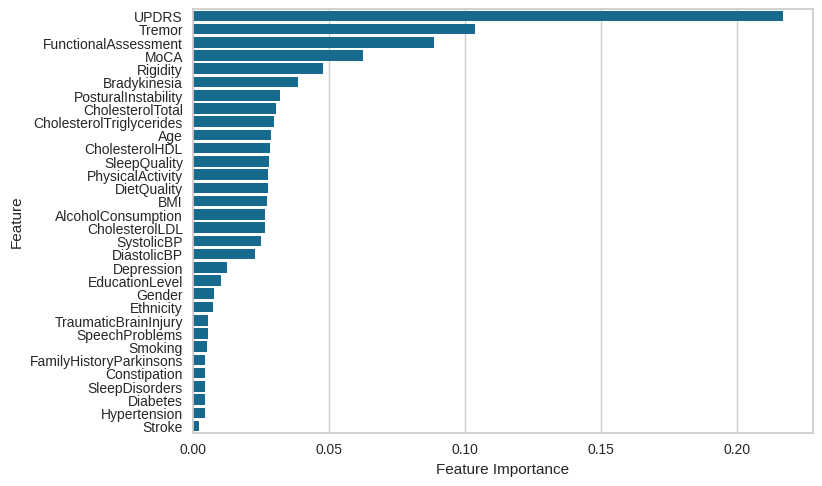

In [573]:
#graficamos la FI
import seaborn as sns
sns.barplot(y=FI['Feature'],x=FI['Importance'],orient='h')
plt.xlabel('Feature Importance')
plt.show()

In [574]:
from re import fullmatch
#Obtenemos la suma acumulada
FI.set_index('Feature',inplace=True)
FI_acum=FI.cumsum(axis=0)
FI_acum

Importance
Feature                             
UPDRS                           0.22
Tremor                          0.32
FunctionalAssessment            0.41
MoCA                            0.47
Rigidity                        0.52
Bradykinesia                    0.56
PosturalInstability             0.59
CholesterolTotal                0.62
CholesterolTriglycerides        0.65
Age                             0.68
CholesterolHDL                  0.71
SleepQuality                    0.74
PhysicalActivity                0.76
DietQuality                     0.79
BMI                             0.82
AlcoholConsumption              0.85
CholesterolLDL                  0.87
SystolicBP                      0.90
DiastolicBP                     0.92
Depression                      0.93
EducationLevel                  0.94
Gender                          0.95
Ethnicity                       0.96
TraumaticBrainInjury            0.96
SpeechProblems                  0.97
Smoking                         0.98
FamilyHistoryParkinsons         0.98
Constipation                    0.98
SleepDisorders                  0.99
Diabetes                        0.99
Hypertension                    1.00
Stroke                          1.00

Las mejores variables según FI son: UPDRS y Tremor

**Permutation Importance**

In [575]:
result=permutation_importance(model_smote,x_test,y_test,n_repeats=30,random_state=42)
result.importances_mean

array([ 0.00546318,  0.        , -0.00174188, -0.00356295, -0.00174188,
       -0.00395883, -0.00150435,  0.00055424, -0.00261283, -0.00387965,
       -0.00087094,  0.00071259, -0.00047506, -0.00055424,  0.00142518,
        0.        , -0.00166271, -0.00300871, -0.00585907, -0.00277118,
       -0.001346  , -0.00253365,  0.19809976,  0.05835313,  0.09247823,
        0.1280285 ,  0.0645289 ,  0.04362629,  0.04022169, -0.0023753 ,
       -0.00364212,  0.00039588])

In [576]:
#Mejoramos la estética del resultado
PI_df=pd.DataFrame({
    'PI': result.importances_mean
}, index=x_test.columns)

#Ibtenemos el valor absoluto
PI_df=np.abs(PI_df)
PI_df.sort_values('PI',ascending=False,inplace=True)
PI_df

PI
UPDRS                    0.20
Tremor                   0.13
FunctionalAssessment     0.09
Rigidity                 0.06
MoCA                     0.06
Bradykinesia             0.04
PosturalInstability      0.04
CholesterolTotal         0.01
Age                      0.01
Smoking                  0.00
SleepQuality             0.00
SleepDisorders           0.00
EducationLevel           0.00
DiastolicBP              0.00
CholesterolLDL           0.00
DietQuality              0.00
CholesterolTriglycerides 0.00
SpeechProblems           0.00
BMI                      0.00
Ethnicity                0.00
SystolicBP               0.00
AlcoholConsumption       0.00
Depression               0.00
CholesterolHDL           0.00
FamilyHistoryParkinsons  0.00
TraumaticBrainInjury     0.00
Diabetes                 0.00
PhysicalActivity         0.00
Hypertension             0.00
Constipation             0.00
Gender                   0.00
Stroke                   0.00

Las mejores variables según PI son: UPDRS y Tremor

**Verificamos con SHAP**

In [577]:
#definimos el explicador
explainer=shap.Explainer(model_smote)
#Aplicamos el explicador a los datos de test
shap_values=explainer(x_test)

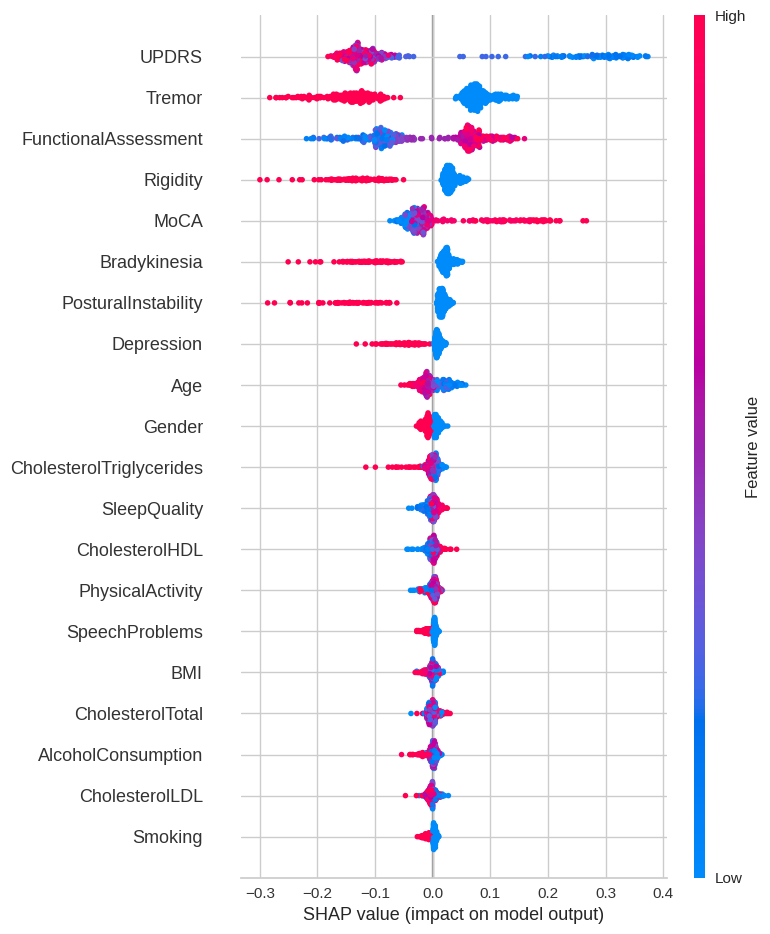

In [578]:
#ver el summary_plot del label 0: No Parkinson
label=0
shap.summary_plot(shap_values[:,:,label],x_test)

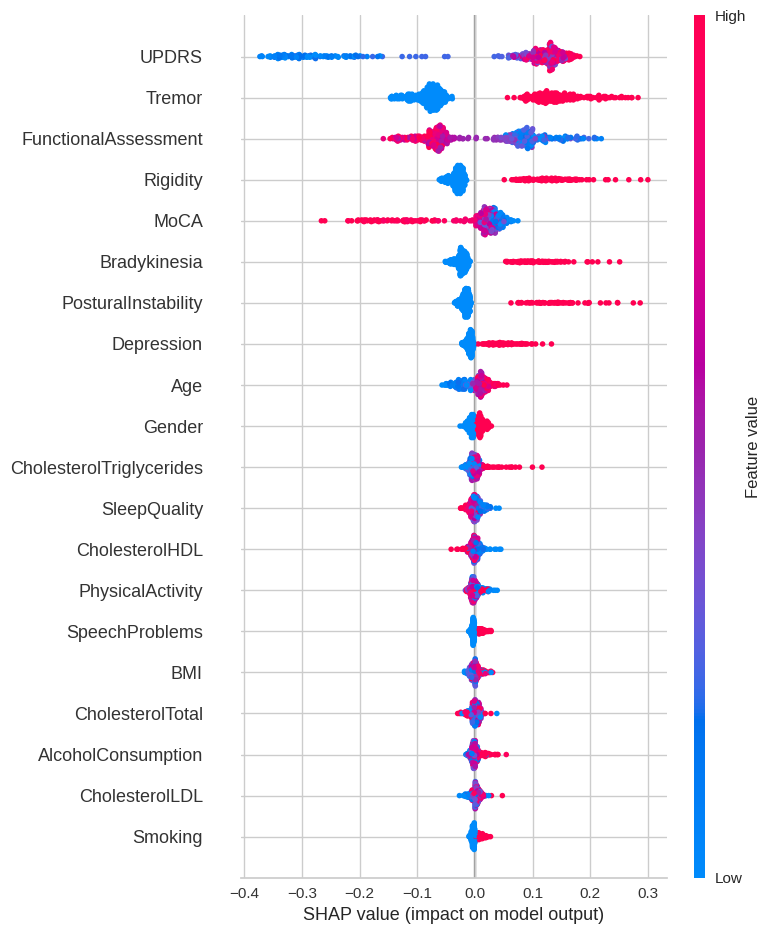

In [579]:
#ver el summary para la variable 1: Parkinson
label=1
shap.summary_plot(shap_values[:,:,label],x_test)

Las variables más importantes según SHAP son: UPDRS y Tremor. Que parecen tener el siguiente efecto:


*   Mientras más bajo sea el valor de UPDRS mayor es la posibilidad de que no tenga Parkinson.
*   Mientras más bajo sea el valor de Tremor, mayor es la probabilidad de que no tenga Parkinson.

Verifiquemos con un Force Plot para un dato.



**Force Plot**

In [580]:
#Definir el pronóstico o instancia a analizar
instance_index=0
#veamos quien es
x_test.iloc[instance_index,:]

Age                         61.00
Gender                       0.00
Ethnicity                    1.00
EducationLevel               2.00
BMI                         15.52
Smoking                      0.00
AlcoholConsumption           4.72
PhysicalActivity             9.94
DietQuality                  2.22
SleepQuality                 9.18
FamilyHistoryParkinsons      1.00
TraumaticBrainInjury         0.00
Hypertension                 0.00
Diabetes                     0.00
Depression                   1.00
Stroke                       0.00
SystolicBP                 102.00
DiastolicBP                 65.00
CholesterolTotal           269.88
CholesterolLDL             174.47
CholesterolHDL              99.39
CholesterolTriglycerides   331.68
UPDRS                       99.54
MoCA                         5.18
FunctionalAssessment         4.61
Tremor                       0.00
Rigidity                     0.00
Bradykinesia                 0.00
PosturalInstability          0.00
SpeechProblems               0.00
SleepDisorders               0.00
Constipation                 0.00
Name: 194, dtype: float64

In [581]:
#Qué pronóstico obtuvo
y_pred_test[instance_index]

1

El pronóstico es que si tiene parkinson.

In [582]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label
label=0
#Obtenemsos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values[instance_index].values[:,label], x_test.iloc[instance_index,:])

Por el Tremor hay un 0.34 de probabilidad de que no tenga Parkinson.

In [583]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label
label=1
#Obtenemsos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values[instance_index].values[:,label], x_test.iloc[instance_index,:])

Por el UPDRS hay un 0.66 de probabilidad de que si tenga parkinson.

Se utilizarán las variables de: UPDRS y Tremor para el resto de los ejercicios, ya que todos concluyen que son las variables más relevantes.

## **Modelos de clasificación con Lazy y Pycaret**

In [584]:
#importar SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from lazypredict.Supervised import LazyClassifier

In [665]:
#Definimos las nuevas variables dependientes e independientes
X = df[['UPDRS','Tremor']]
y= df['Diagnosis']
print(X.shape)
y.shape

(2105, 2)


(2105,)

In [666]:
#Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
print(y_train.value_counts())
x_train.shape,x_test.shape, y_train.shape, y_test.shape

Diagnosis
1    1043
0     641
Name: count, dtype: int64


((1684, 2), (421, 2), (1684,), (421,))

In [667]:
#Implementamos RF by default
model_rf=RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [668]:
#vemos su performance general
accuracy_train=model_rf.score(x_train,y_train)
accuracy_test=model_rf.score(x_test,y_test)
print('Accuracy test= {:.4f}'.format(accuracy_test))

Accuracy test= 0.6912


### **Balance de clases - Oversampling**

In [669]:
#SMOTE: Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

#Definir la técnica
smote = SMOTE(sampling_strategy='auto',random_state=42)
#Aplicamos la técnica
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)
print(x_train_smote.shape)
np.bincount(y_train_smote)

(2086, 2)


array([1043, 1043])

In [670]:
#Implementamos el modelo Random Forest
model_smote = RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [671]:
#Evaluamos el resultado o explicación de la Y en función de las Xs
y_pred_test = model_smote.predict(x_test)
accuracy = model_smote.score(x_test,y_test)
print('Accuracy = {:.4f}'.format(accuracy))

Accuracy = 0.6722


### **Balance de clases - Undersampling**

In [672]:
#Random Under Sampling - RUS
from imblearn.under_sampling import RandomUnderSampler

#Definir la técnica
rus = RandomUnderSampler(sampling_strategy='auto',random_state=42)
#Aplicamos la técnica
x_train_rus, y_train_rus = rus.fit_resample(x_train,y_train)
print(x_train_rus.shape)
np.bincount(y_train_rus)

(1282, 2)


array([641, 641])

In [673]:
#Implementamos el modelo Random Forest
model_rus = RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [674]:
#Evaluamos el resultado o explicación de la Y en función de las Xs
y_pred_test = model_rus.predict(x_test)
accuracy = model_rus.score(x_test,y_test)
print('Accuracy = {:.4f}'.format(accuracy))

Accuracy = 0.6746


Es mejor utilizar el modelo de smote

### **Implementación de Lazy Classifier**

In [675]:
#Definimos a Lazy
clf_lazy=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

In [596]:
#Ajustamos y evaluamos al lazy classifier
models,predictions=clf_lazy.fit(x_train_smote,x_test,y_train_smote,y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1043, number of negative: 1043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [597]:
#Observamos los resultados de los modelos
models.head()

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                  
LGBMClassifier            0.76               0.75     0.75      0.76   
XGBClassifier             0.74               0.74     0.74      0.75   
LabelSpreading            0.71               0.71     0.71      0.71   
LabelPropagation          0.71               0.71     0.71      0.71   
KNeighborsClassifier      0.72               0.71     0.71      0.73   

                      Time Taken  
Model                             
LGBMClassifier              0.13  
XGBClassifier               0.29  
LabelSpreading              0.29  
LabelPropagation            0.19  
KNeighborsClassifier        0.03

In [598]:
#ver resultados con datos de validación
predictions.head()

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                  
LGBMClassifier            0.76               0.75     0.75      0.76   
XGBClassifier             0.74               0.74     0.74      0.75   
LabelSpreading            0.71               0.71     0.71      0.71   
LabelPropagation          0.71               0.71     0.71      0.71   
KNeighborsClassifier      0.72               0.71     0.71      0.73   

                      Time Taken  
Model                             
LGBMClassifier              0.13  
XGBClassifier               0.29  
LabelSpreading              0.29  
LabelPropagation            0.19  
KNeighborsClassifier        0.03

Los dos mejores modelos son LGBMClassifier y XGBC Classifier

**LGBM Classifier**

In [599]:
from lightgbm import LGBMClassifier

In [676]:
#implementamos el modelo by default
model_lgbm=LGBMClassifier()
#Entrenamos el modelo
model_lgbm.fit(x_train_smote,y_train_smote)

[LightGBM] [Info] Number of positive: 1043, number of negative: 1043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=None, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [677]:
#Evaluamos el modelo
accuracy_train=model_lgbm.score(x_train_smote,y_train_smote)
accuracy_test=model_lgbm.score(x_test,y_test)
print('Accuracy train= {:.2f}'.format(accuracy_train))
print('Accuracy test= {:.2f}'.format(accuracy_test))

print('Diferencia(%)={:.4f}%'.format(np.abs(accuracy_train-accuracy_test)*100))

Accuracy train= 0.81
Accuracy test= 0.75
Diferencia(%)=6.1487%


In [678]:
#Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[101,  59],
       [ 78, 183]])

In [679]:
#¿Cuántos aciertos son?
print("Aciertos =",np.sum(y_test==y_pred_test))
#¿Cuántos errores?
print("Errores =",np.sum(y_test!=y_pred_test))

Aciertos = 284
Errores = 137


In [680]:
#obtener el reporte de clasificación
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
print(classification_report(y_test,y_pred_test))
print('G-Mean= {:.4f}'.format(geometric_mean_score(y_test,y_pred_test)))

              precision    recall  f1-score   support

           0       0.56      0.63      0.60       160
           1       0.76      0.70      0.73       261

    accuracy                           0.67       421
   macro avg       0.66      0.67      0.66       421
weighted avg       0.68      0.67      0.68       421

G-Mean= 0.6653


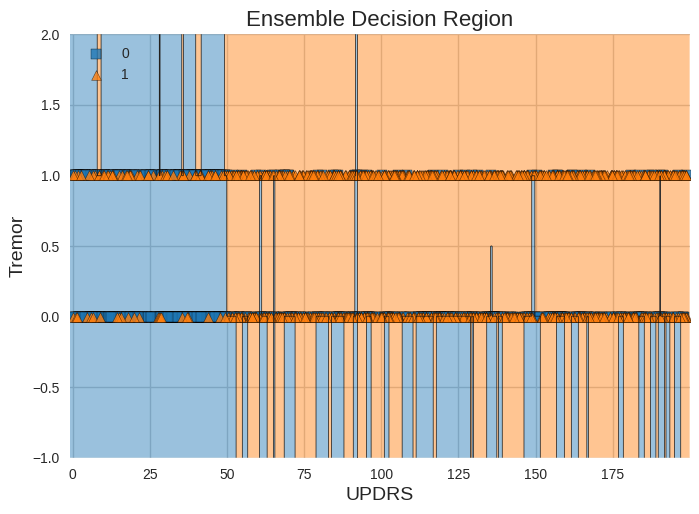

In [681]:
#obtener la matriz de confusión
from mlxtend.plotting import plot_decision_regions

#transformar las variables a tipo vector
X_p=np.array(X)
y_p=np.array(y)

#Generamos el gráfico
plot_decision_regions(X_p,y_p,clf=ensemble_clf,legend=2)
plt.xlabel(X.columns[0],size=14)
plt.ylabel(X.columns[1],size=14)
plt.title('Ensemble Decision Region',size=16)
plt.show()

**XGB Classifier**

In [602]:
from xgboost import XGBClassifier

In [682]:
#Implementamos el modelo by default
model_xgb=XGBClassifier()
#Entrenamos el modelo
model_xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [683]:
#Evaluamos el modelo
accuracy_train=model_xgb.score(x_train_smote,y_train_smote)
accuracy_test=model_xgb.score(x_test,y_test)
print('Accuracy train= {:.2f}'.format(accuracy_train))
print('Accuracy test= {:.2f}'.format(accuracy_test))

print('Diferencia(%)={:.4f}%'.format(np.abs(accuracy_train-accuracy_test)*100))

Accuracy train= 0.82
Accuracy test= 0.74
Diferencia(%)=7.5324%


In [684]:
#Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[101,  59],
       [ 78, 183]])

In [685]:
#¿Cuántos aciertos son?
print("Aciertos =",np.sum(y_test==y_pred_test))
#¿Cuántos errores?
print("Errores =",np.sum(y_test!=y_pred_test))

Aciertos = 284
Errores = 137


In [686]:
#obtener el reporte de clasificación
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
print(classification_report(y_test,y_pred_test))
print('G-Mean= {:.4f}'.format(geometric_mean_score(y_test,y_pred_test)))

              precision    recall  f1-score   support

           0       0.56      0.63      0.60       160
           1       0.76      0.70      0.73       261

    accuracy                           0.67       421
   macro avg       0.66      0.67      0.66       421
weighted avg       0.68      0.67      0.68       421

G-Mean= 0.6653


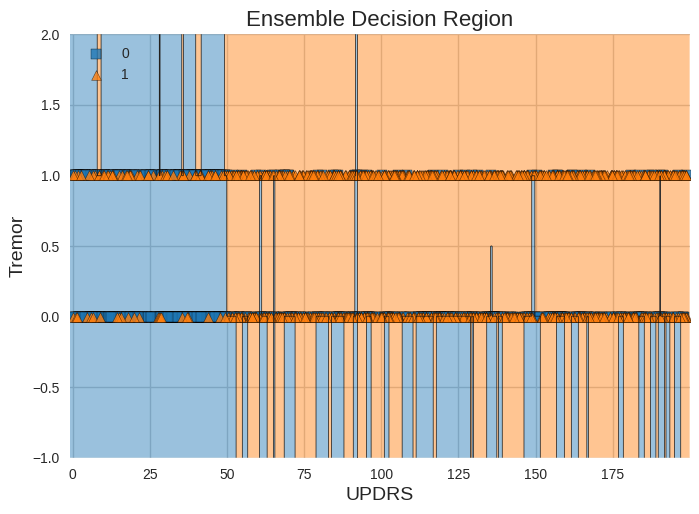

In [687]:
#obtener la matriz de confusión
from mlxtend.plotting import plot_decision_regions

#transformar las variables a tipo vector
X_p=np.array(X)
y_p=np.array(y)

#Generamos el gráfico
plot_decision_regions(X_p,y_p,clf=ensemble_clf,legend=2)
plt.xlabel(X.columns[0],size=14)
plt.ylabel(X.columns[1],size=14)
plt.title('Ensemble Decision Region',size=16)
plt.show()

### **Implementación de Pycaret**

In [609]:
from pycaret.classification import * #todo lo que contiene clasificación
from pycaret.classification import ClassificationExperiment

In [610]:
#Definir las variables ind y dep a usar
X=df[['UPDRS','Tremor']]
y=df['Diagnosis']
print(X.shape)
print(y.shape)

(2105, 2)
(2105,)


In [611]:
#Dividimos los datos en train y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, stratify=y)
print(y_train.value_counts())
X_train.shape,X_test.shape,y_train.shape,y_test.shape

Diagnosis
1    1043
0     641
Name: count, dtype: int64


((1684, 2), (421, 2), (1684,), (421,))

**Balanceo de clases - Oversampling**

In [612]:
#SMOTE: Synthetic Mynority Oversampling Technique
from imblearn.over_sampling import SMOTE

#Definir la técnica
smote=SMOTE(sampling_strategy='auto',random_state=42)
#Aplicamos la técnica
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print(X_train_smote.shape)
np.bincount(y_train_smote)

#Juntar todo en un DataFrame
xy_smote=pd.DataFrame(X_train_smote).assign(Diagnosis=y_train_smote)
xy_smote.head(2)

(2086, 2)


UPDRS  Tremor  Diagnosis
0 114.94       0          0
1 191.99       1          1

**Pycaret Classification Experiment**

In [613]:
#Definimos a Pycaret
clf_pycaret=ClassificationExperiment()
#configutar pycaret
clf_pycaret.setup(data=xy_smote,target='Diagnosis',train_size=0.7,session_id=123)

In [614]:
#Evaluamos los modelos de pycaret
top2_models=clf_pycaret.compare_models(sort='Accuracy',n_select=2)

Processing:   0%|          | 0/66 [00:00<?, ?it/s]

In [615]:
#Observar los 2 mejores modelos
top2_models

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='binary:logistic', ...),
 AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=123)]

In [616]:
#Optimizar cada uno de los mejores modelos encontrados
tuned_models=[clf_pycaret.tune_model(model) for model in top5_models]

#Mostrar los resultados
for i, tuned in enumerate(tuned_models):
  print(f'Modelo {i+1}:')
  print(tuned)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo 1:
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)
Modelo 2:
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, lear

In [617]:
#ver los modelos optimizados
tuned_models

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='binary:logistic', ...),
 AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=123)]

### **Implementamos los mejores modelos de Pycaret**

**XGBClassifier**

In [618]:
#Definimos primer modelo
model_xgb=tuned_models[0]
#Entrenamos el modelo
model_xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [619]:
#Evaluamos el modelo
accuracy_train=model_xgb.score(x_train_smote,y_train_smote)
accuracy_test=model_xgb.score(X_test,y_test)
print('Accuracy train= {:.2f}'.format(accuracy_train))
print('Accuracy test= {:.2f}'.format(accuracy_test))

print('Diferencia(%)={:.4f}%'.format(np.abs(accuracy_train-accuracy_test)*100))

Accuracy train= 0.82
Accuracy test= 0.74
Diferencia(%)=7.5324%


**AdaBoostClassifier**

In [688]:
#Definimos el segundo modelo
model_ada=tuned_models[1]
#Entrenamos el modelo
model_ada.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [689]:
#Revisamos su performance
#Evaluamos el modelo
accuracy_train=model_ada.score(x_train_smote,y_train_smote)
accuracy_test=model_ada.score(x_test,y_test)
print('Accuracy train= {:.2f}'.format(accuracy_train))
print('Accuracy test= {:.2f}'.format(accuracy_test))

print('Diferencia(%)={:.4f}%'.format(np.abs(accuracy_train-accuracy_test)*100))

Accuracy train= 0.75
Accuracy test= 0.70
Diferencia(%)=5.3362%


In [690]:
#Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[101,  59],
       [ 78, 183]])

In [691]:
#¿Cuántos aciertos son?
print("Aciertos =",np.sum(y_test==y_pred_test))
#¿Cuántos errores?
print("Errores =",np.sum(y_test!=y_pred_test))

Aciertos = 284
Errores = 137


In [692]:
#obtener el reporte de clasificación
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
print(classification_report(y_test,y_pred_test))
print('G-Mean= {:.4f}'.format(geometric_mean_score(y_test,y_pred_test)))

              precision    recall  f1-score   support

           0       0.56      0.63      0.60       160
           1       0.76      0.70      0.73       261

    accuracy                           0.67       421
   macro avg       0.66      0.67      0.66       421
weighted avg       0.68      0.67      0.68       421

G-Mean= 0.6653


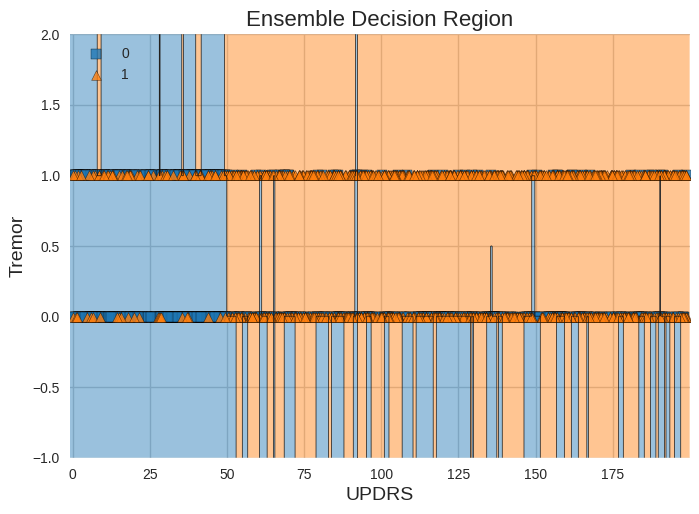

In [693]:
#obtener la matriz de confusión
from mlxtend.plotting import plot_decision_regions

#transformar las variables a tipo vector
X_p=np.array(X)
y_p=np.array(y)

#Generamos el gráfico
plot_decision_regions(X_p,y_p,clf=ensemble_clf,legend=2)
plt.xlabel(X.columns[0],size=14)
plt.ylabel(X.columns[1],size=14)
plt.title('Ensemble Decision Region',size=16)
plt.show()

Los mejores modelos según Pycaret son: XGB Classifier (by default) y AdaBoostClassifier.

## **Implementación del modelo de ensamble**

Nota: Solo se implementarán 3 modelos en vez de 4, ya que tanto Pycaret como LazyClassifier dieron como mejor modelo el XGB Classifier by default

In [622]:
#Definimos los modelos
clf1=model_xgb
clf2=model_lgbm
clf3=model_ada

In [623]:
#Definimos el modelo de ensamble
ensemble_clf=VotingClassifier(estimators=[('clf1',clf1),('clf2',clf2),('clf3',clf3)],voting='soft')

#Entrenamos el modelo de ensamble
ensemble_clf.fit(X_train_smote,y_train_smote)

[LightGBM] [Info] Number of positive: 1043, number of negative: 1043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('clf1',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...
                                             n_estimators=100, n_jobs=None,
                                             num_leaves=31, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)),
                             ('clf3',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='soft', weights=None)

In [624]:
#Evaluamos el resultado o explicación de la Y en función de las Xs
y_pred_test=ensemble_clf.predict(X_test)
print(y_pred_test[0:5])
y_test.head()

[1 0 1 1 1]


194     1
1879    1
136     1
1522    1
326     1
Name: Diagnosis, dtype: int64

In [625]:
#Evaluamos el modelo
accuracy_train=ensemble_clf.score(X_train_smote,y_train_smote)
accuracy_test=ensemble_clf.score(X_test,y_test)
print('Accuracy train= {:.2f}'.format(accuracy_train))
print('Accuracy test= {:.2f}'.format(accuracy_test))

print('Diferencia(%)={:.4f}%'.format(np.abs(accuracy_train-accuracy_test)*100))

Accuracy train= 0.82
Accuracy test= 0.74
Diferencia(%)=7.9638%


No tiene overfitting

In [626]:
#Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[114,  46],
       [ 62, 199]])

In [627]:
#¿Cuántos aciertos son?
print("Aciertos =",np.sum(y_test==y_pred_test))
#¿Cuántos errores?
print("Errores =",np.sum(y_test!=y_pred_test))

Aciertos = 313
Errores = 108


In [628]:
#obtener el reporte de clasificación
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
print(classification_report(y_test,y_pred_test))
print('G-Mean= {:.4f}'.format(geometric_mean_score(y_test,y_pred_test)))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       160
           1       0.81      0.76      0.79       261

    accuracy                           0.74       421
   macro avg       0.73      0.74      0.73       421
weighted avg       0.75      0.74      0.75       421

G-Mean= 0.7371


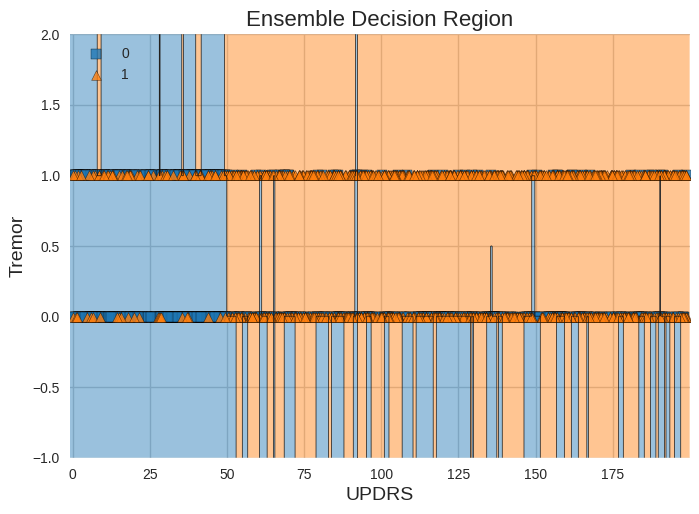

In [629]:
#obtener la matriz de confusión
from mlxtend.plotting import plot_decision_regions

#transformar las variables a tipo vector
X_p=np.array(X)
y_p=np.array(y)

#Generamos el gráfico
plot_decision_regions(X_p,y_p,clf=ensemble_clf,legend=2)
plt.xlabel(X.columns[0],size=14)
plt.ylabel(X.columns[1],size=14)
plt.title('Ensemble Decision Region',size=16)
plt.show()

**Obtener nuevos pronósticos**

In [630]:
X_train_smote.head()

UPDRS  Tremor
0 114.94       0
1 191.99       1
2 121.43       0
3  30.95       0
4  63.07       1

In [631]:
#Forma 2:
x_new=pd.DataFrame({'UPDRS':[115,125,70],'Tremor':[0,1,0]})
x_new

UPDRS  Tremor
0    115       0
1    125       1
2     70       0

In [632]:
y_pred_new=ensemble_clf.predict(x_new)
y_pred_new

array([0, 1, 0])

## **SHAP & LIME**

### **SHAP**

In [633]:
# Paso 1: Inicializar SHAP
shap.initjs()

#Definir una muestra para los datos de train
x_train_sample = shap.sample(X_train_smote, 500, random_state=123)

#Obtener una muestra de los datos de test
x_test_sample = X_test[:100]

#Definimos el explicador de shap Kernel
explainer = shap.KernelExplainer(
    model=ensemble_clf.predict_proba,
    data=x_train_sample
)

#Aplicamos el explicador
shap_values_voting = explainer.shap_values(x_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

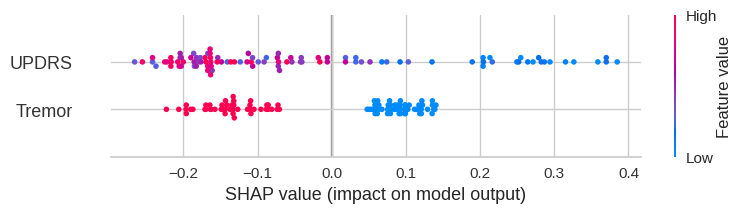

In [634]:
#Ver los resultados para Label 0 = No parkinson
label=0
shap.summary_plot(shap_values_voting[:,:,label], x_test_sample)

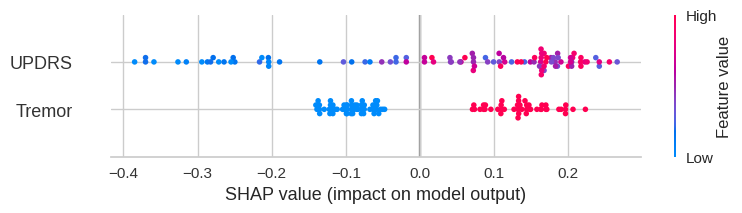

In [635]:
#Ver los resultados para Label 1 = parkinson
label=1
shap.summary_plot(shap_values_voting[:,:,label], x_test_sample)

**Force Plot**

In [636]:
#Aplicamos el force plot para una muestra de los datos de test
instance_index=0
#vemos la muestra
x_test_sample.iloc[instance_index,:]

UPDRS    99.54
Tremor    0.00
Name: 194, dtype: float64

In [637]:
#Qué pronóstico obtuvo
y_pred_test[instance_index]

1

In [638]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label = No parkinson
label = 0
#Obtenemos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values_voting[instance_index, :, label], x_test_sample.iloc[instance_index,:])

In [639]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label = Low Mid Price
label = 1
#Obtenemos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values_voting[instance_index, :, label], x_test_sample.iloc[instance_index,:])

In [640]:
#Aplicamos el force plot para una muestra de los datos de test
instance_index=1
#vemos la muestra
x_test_sample.iloc[instance_index,:]

UPDRS    122.73
Tremor     0.00
Name: 1879, dtype: float64

In [641]:
#Qué pronóstico obtuvo
y_pred_test[instance_index]

0

In [642]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label = No parkinson
label = 0
#Obtenemos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values_voting[instance_index, :, label], x_test_sample.iloc[instance_index,:])

In [643]:
#Inicializar la aplicación
shap.initjs()

#Definimos el label = Low Mid Price
label = 1
#Obtenemos el diagrama de fuerzas
shap.force_plot(explainer.expected_value[label], shap_values_voting[instance_index, :, label], x_test_sample.iloc[instance_index,:])

### **LIME**

In [644]:
!pip install lime

In [645]:
import lime
#lime tabular
import lime.lime_tabular

In [646]:
#Definir e inicializar el explicador LIME
explainer=lime.lime_tabular.LimeTabularExplainer(X_train_smote.values, feature_names=X.columns,class_names=['No Parkinson','Parkinson'],mode='classification')

In [647]:
#Seleccionamos un paciente o registro de los datos de test
instance_index=0
instance=X_test.iloc[instance_index].values
pronostico=y_test.iloc[instance_index]
print(instance)
print(pronostico)

[99.53742647  0.        ]
1


In [648]:
#Generamos la explicación
explanation=explainer.explain_instance(instance,ensemble_clf.predict_proba)

#Mostramos los resultados
explanation.show_in_notebook()

In [649]:
#Ver el explanation list
explanation.as_list()

[('Tremor <= 0.00', -0.24570442819147345),
 ('95.96 < UPDRS <= 143.92', 0.08219882889223465)]

In [650]:
#Seleccionamos un paciente o registro de los datos de test
instance_index=1
instance=X_test.iloc[instance_index].values
pronostico=y_test.iloc[instance_index]
print(instance)
print(pronostico)

[122.72502143   0.        ]
1


In [651]:
#Generamos la explicación
explanation=explainer.explain_instance(instance,ensemble_clf.predict_proba)

#Mostramos los resultados
explanation.show_in_notebook()

In [652]:
#Ver el explanation list
explanation.as_list()

[('Tremor <= 0.00', -0.2510448309729658),
 ('95.96 < UPDRS <= 143.92', 0.07315574675225736)]

## **Series de Tiempo**

**Autocorrelación y correlograma**

In [653]:
#Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [654]:
from google.colab import files
uploaded = files.upload()

In [655]:
ts=pd.read_csv('AirPassengers.csv')
print(ts.shape)
ts.head()

(144, 2)


Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [656]:
#Convertimos a índice el tiempo
ts.set_index('Month',inplace=True)
ts.head()

#Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121

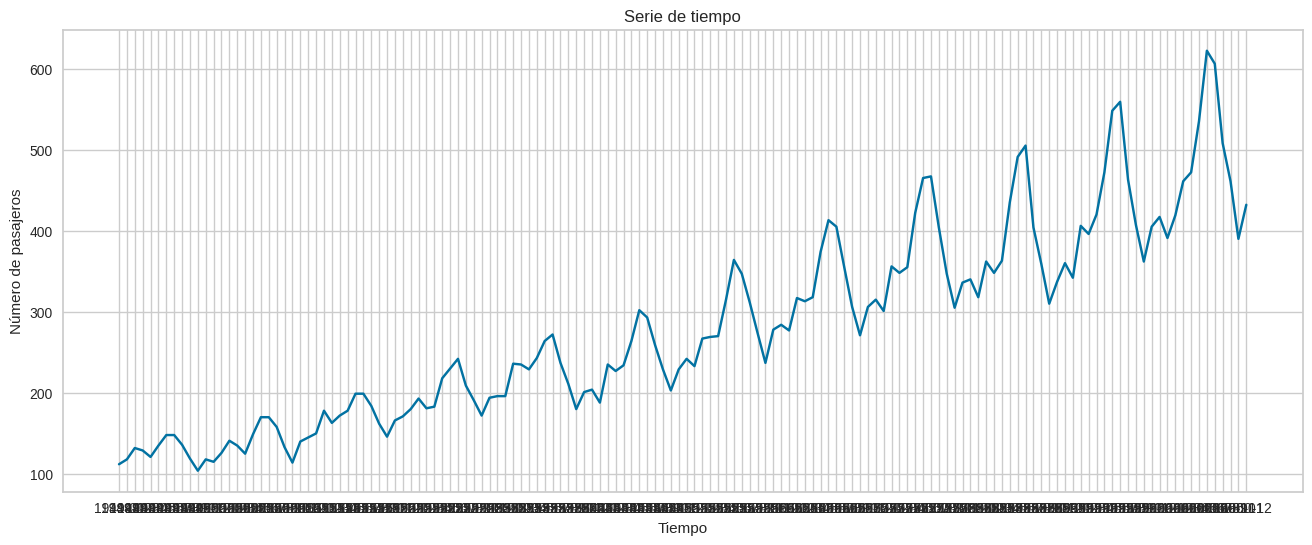

In [657]:
#Graficamos la serie de tiempo
plt.figure(figsize=(16,6))
plt.plot(ts)
plt.xlabel('Tiempo')
plt.ylabel('Número de pasajeros')
plt.title('Serie de tiempo')
plt.show()

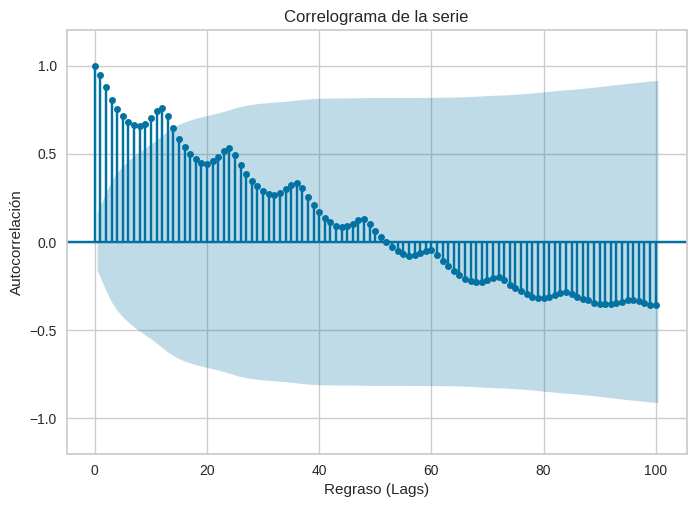

In [658]:
#Graficamos el correlograma
plot_acf(ts,lags=100)
plt.xlabel('Regraso (Lags)')
plt.ylabel('Autocorrelación')
plt.title('Correlograma de la serie')
plt.gca().set_ylim(-1.2,1.2)
plt.show()

### **HoltWinters**

In [659]:
#Importar las librerías
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#importamos las métricas
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [660]:
#Definir el modelo SET
L=12 #se repite cada 12 meses
model=ExponentialSmoothing(ts['#Passengers'],trend='add',seasonal='add',seasonal_periods=L)
#ajustamos el modelo
fit=model.fit()

In [661]:
#Ver los parámetros del modelo
model.params

{'smoothing_level': 0.25254989686499935,
 'smoothing_trend': 9.765463812739731e-07,
 'smoothing_seasonal': 0.7474446031813125,
 'damping_trend': nan,
 'initial_level': 118.43092695514434,
 'initial_trend': 2.59469363494243,
 'initial_seasons': array([ -9.06562263,  -3.43708014,   9.00565253,   3.81742261,
         -4.93283548,   9.17620296,  21.3830049 ,  18.84610688,
          4.61900836, -14.34042469, -28.91443539, -12.43815072]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [662]:
#Obtenemos la serie ajustada
y_fit=fit.fittedvalues
print('y_fit = \n',y_fit.head())
print('y =',ts.head())

y_fit = 
 Month
1949-01   111.96
1949-02   120.19
1949-03   134.68
1949-04   131.41
1949-05   124.64
dtype: float64
y =          #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121


In [663]:
y_pred=fit.forecast(steps=12) #un año de pronósticos
print('y_pred = \n',y_pred.head())

y_pred = 
 1961-01-01   451.58
1961-02-01   427.26
1961-03-01   464.70
1961-04-01   500.10
1961-05-01   508.66
Freq: MS, dtype: float64


TypeError: tz must be string or tzinfo subclass.

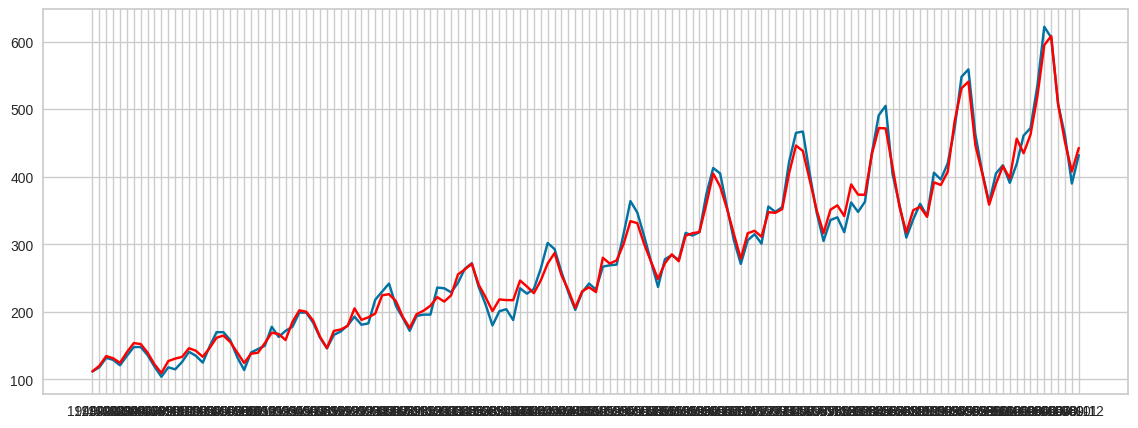

In [664]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(ts,label='y')
plt.plot(y_fit.index,y_fit,color='red',label='y fit')
plt.plot(y_pred.index,y_pred,color='green',label='y pred')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('HoldWinters Model')
plt.show()

**Evaluamos el modelo**

In [ ]:
mse=mean_squared_error(ts['#Passengers'],y_fit)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(ts['#Passengers'],y_fit)*100
mpe=np.mean((ts['#Passengers']-y_fit)/ts['#Passengers'])*100
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape:.2f}%')
print(f'MPE = {mpe:.2f}%')

### **Decompose Time Series**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

**Descomposición multiplicativa**

In [ ]:
#Definir la longitud y estacionalidad
L=12
#Definimos el modelo
model_mul=sm.tsa.seasonal_decompose(ts['#Passengers'],model='multiplicative',period=L)

In [ ]:
#Graficamos el modelo
model_mul.plot()
plt.show()

In [ ]:
#Obtenemos la serie ajustada (omitir los primeros L/2 y los últimos L/2)
y_fit_mul=model_mul.trend*model_mul.seasonal
print('y_fit_mul = \n',y_fit_mul[int(L/2):int(L/2+5)])
print('y= \n',ts.iloc[int(L/2):int(L/2+5)])

In [ ]:
model_mul.trend.iloc[-1-int(L/2)]

In [ ]:
#Generamos los pronósticos de forma multiplicativa
n_forecast=12 # un año

#Proyectar la tendencia a futuro
trend_forecast = model_mul.trend.iloc[-1-int(L/2)] + np.arange(1, n_forecast+1) * (model_mul.trend.iloc[-1-int(L/2)]-model_mul.trend.iloc[-2-int(L/2)])
#desventaja, manualmente proyectar los componentes a futuro
seasonal_forecast = model_mul.seasonal[-n_forecast:] / model_mul.seasonal[-n_forecast:].mean()


In [ ]:
y_pred_mul=trend_forecast*seasonal_forecast
y_pred_mul[0:5]

In [ ]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(ts,label='y')
plt.plot(y_fit_mul.index,y_fit_mul,color='red',label='y fit')
forecast_dates = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
plt.plot(forecast_dates,y_pred_mul,color='green',label='y pred')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('Decomp Multiplicative Model')
plt.show()

**Evaluamos el modelo**

In [ ]:
mse=mean_squared_error(ts['#Passengers'].iloc[int(L/2):int(-L/2)],y_fit_mul.iloc[int(L/2):int(-L/2)])
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(ts['#Passengers'].iloc[int(L/2):int(-L/2)],y_fit_mul.iloc[int(L/2):int(-L/2)])*100
mpe=np.mean((ts['#Passengers'].iloc[int(L/2):int(-L/2)]-y_fit_mul.iloc[int(L/2):int(-L/2)])/ts['#Passengers'])*100
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape:.2f}%')
print(f'MPE = {mpe:.2f}%')

**Descomposición aditiva**

In [ ]:
#Definir la L
L=12
#Definimos el modelo
model_add=sm.tsa.seasonal_decompose(ts['#Passengers'],model='additive',period=L)

In [ ]:
#Obtemeos las componentes de forma aditiva
fig=model_add.plot()
plt.show()

In [ ]:
#Obtenemos la serie ajustada
y_fit_add=model_add.trend+model_add.seasonal
print('y_fit_add = \n',y_fit_add[int(L/2):int(L/2)+5])
print('y= \n',ts.iloc[int(L/2):int(L/2)+5])

In [ ]:
#Generamos los pronósticos de forma aditiva
n_forecast=12

#Proyectar la tendencia a futuro
trend_forecast = model_add.trend.iloc[-1-int(L/2)] + np.arange(1, n_forecast+1) * (model_add.trend.iloc[-1-int(L/2)]-model_add.trend.iloc[-2-int(L/2)])
#desventaja, manualmente proyectar los componentes a futuro
seasonal_forecast = model_add.seasonal[-n_forecast:] + model_add.seasonal[-n_forecast:].mean()

In [ ]:
#Obtenemos los pronósticos de forma aditiva
y_pred_add=trend_forecast+seasonal_forecast
y_pred_add[0:5]

In [ ]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(ts,label='y')
plt.plot(y_fit_add.index,y_fit_add,color='red',label='y_fit_add')
forecast_dates = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
plt.plot(forecast_dates,y_pred_mul,color='green',label='y pred')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('Decomp Additive Model')
plt.show()

**Evaluamos el modelo**

In [ ]:
mse=mean_squared_error(ts['#Passengers'].iloc[int(L/2):int(-L/2)],y_fit_add.iloc[int(L/2):int(-L/2)])
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(ts['#Passengers'].iloc[int(L/2):int(-L/2)],y_fit_add.iloc[int(L/2):int(-L/2)])*100
mpe=np.mean((ts['#Passengers'].iloc[int(L/2):int(-L/2)]-y_fit_add.iloc[int(L/2):int(-L/2)])/ts['#Passengers'])*100
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape:.2f}%')
print(f'MPE = {mpe:.2f}%')

### **ARIMA**

In [ ]:
#Instalar la librería
!pip install statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [ ]:
#Cambiamos el formato de la base de datos
ts_arima=pd.DataFrame(ts['#Passengers']).copy()

#Agregamos las columnas necesarias
ts_arima=(ts_arima
          .reset_index()
          .rename(columns={'Month':'ds','#Passengers':'y'})
          .assign(unique_id='series_1')
          [['unique_id','ds','y']])

ts_arima.head()

In [ ]:
#Definir el modelo
L=12
modelos=[AutoARIMA(season_length=L)]
sf=StatsForecast(models=modelos,freq='M') #freq='D','W','ME','MS','A','Q'
sf.fit(ts_arima)

In [ ]:
#Obtenemos la configuración del modelo
arima_string(sf.fitted_[0,0].model_)

In [ ]:
#Obtenemos los coeficientes del modelo
sf.fitted_[0,0].model_['coef']

In [ ]:
#Obtenemos los pronósticos
h=12 #un año
y_pred=sf.forecast(df=ts_arima,h=h,fitted=True)

#Renombramos la columna
y_pred=y_pred.rename(columns={'AutoARIMA':'y_pred'})
y_pred.head()

In [ ]:
#Obtenemos la serie ajustada
y_yfit=sf.forecast_fitted_values()
y_yfit=y_yfit.rename(columns={'AutoARIMA':'y_fit'})
y_yfit.head()

In [ ]:
y_yfit.head(2)

In [ ]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(y_yfit['ds'],y_yfit['y'],label='y')
plt.plot(y_yfit['ds'],y_yfit['y_fit'], color='red',label='y_fit',alpha=0.8)
plt.plot(y_pred['ds'],y_pred['y_pred'],color='green',label='y_pred')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('ARIMA Model')
plt.legend()
plt.show()

**Evaluamos el modelo**

In [ ]:
mse = mean_squared_error(y_yfit['y'],y_yfit['y_fit'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_yfit['y'],y_yfit['y_fit'])*100 #entre 0-1, *100 para %
mpe = np.mean((y_yfit['y']-y_yfit['y_fit'])/y_yfit['y'])*100 #real-ajustada/real

#Mostramos los resultados
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'MPE: {mpe:.2f}%')

### **MLP Regressor**

In [ ]:
#importamos las métricas
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from datetime import datetime,timedelta
from pandas.tseries.offsets import DateOffset

In [ ]:
#Definimos el input y el output
X=ts['#Passengers'][:-1].to_numpy().reshape(-1,1) #todos los datos excepto el último y se convierte en multivariables
y=ts['#Passengers'][1:] #todos los datos excepto el primero
print(X[0:5])
y.head()

In [ ]:
#Semilla de aleatoriedad
seed=42

#Definimimos la red
model=MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam',max_iter=500,random_state=seed)
#Entrenamos la red
model.fit(X,y)

In [ ]:
#Obtenemos la serie ajustada
y_fit=model.predict(X) #tener en cuenta que el y_fit no tiene el último dato
print('y_fit = \n',y_fit[0:5])
print('y = \n',ts.head())

In [ ]:
#Generamos los datos de futuro
n_steps=12 #un año
#Definimos un input con los n_steps anteriores
x_new=ts['#Passengers'].iloc[-n_steps:].to_numpy()
x_new=x_new.reshape(n_steps,-1)

#Generamos los pronósticos
y_pred=model.predict(x_new)
print('y_pred = \n',y_pred)

In [ ]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(ts.index,ts['#Passengers'],label='y')
plt.plot(ts.index[:-1],y_fit, color='red',label='y_fit',alpha=0.8)
# Crear rango de fechas futuro (1 mes después del último)
future_dates = pd.date_range(start=ts.index[-1] + DateOffset(months=1), periods=n_steps, freq='MS')
plt.plot(future_dates, y_pred, color='green', label='y_pred')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('ANN Model')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(ts['#Passengers'].iloc[0:-1], y_fit)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ts['#Passengers'].iloc[0:-1], y_fit) * 100  # entre 0-1, *100 para %
mpe = np.mean((ts['#Passengers'].iloc[0:-1] - y_fit) / ts['#Passengers'].iloc[0:-1]) * 100  # real-ajustada/real

# Mostramos los resultados
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'MPE: {mpe:.2f}%')

### **LSTM - Red neuronal**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#Preprocesamiento de los datos

#Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ts['#Passengers'].values.reshape(-1,1))

#Definimos la X y la "y"
X = scaled_data[:-1] #Todos los datos menos el último
y = scaled_data[1:] #Todos los datos menos el primero

X,y = np.array(X),np.array(y)

#Dividimos los tratos en train y test
train_size = int(len(X)*0.8)
X_train,y_train=X[:train_size],y[:train_size]
X_test,y_test=X[train_size:],y[train_size:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
#Construir el modelo LSTM
model=Sequential()

#Primera capa LSTM
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

#Segunda Capa LSTM
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#Tercera capa LSTM
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Capa de salida
model.add(Dense(units=1))

#Compilamos el modelo
model.compile(optimizer='adam',loss='mean_squared_error') #MSE

#Entrenamos la red
early_stop=EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=[X_test,y_test],callbacks=[early_stop],verbose=1)

In [ ]:
#Evaluar el modelo
loss=model.evaluate(X_test,y_test,verbose=1)
print('Loss:',loss)

In [ ]:
#Generamos los datos de ajuste de train
y_pred_train=model.predict(X_train)
#Desescalamos la variable
y_pred_train=scaler.inverse_transform(y_pred_train)

In [ ]:
#Generamos los datos de futuro (tomamos todos los datos anteriores)
n_steps = 12 #un año
#Definimos un input con los n_steps anteriores
x_new = ts['#Passengers'].iloc[-n_steps:].to_numpy()
x_new_scaled=scaler.transform(x_new.reshape(-1,1))
x_new_scaled = x_new_scaled.reshape(-1,1)

#Generamos los pronósticos
y_pred_new_scaled = model.predict(x_new_scaled)
#Desescalamos
y_pred_new = scaler.inverse_transform(y_pred_new_scaled.reshape(-1,1))
print('y_pred = \n', y_pred_new)

In [ ]:
#Obtenemos la train y test sin escalar para graficar y evaluar el modelo
y_train_real = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
#Graficamos la serie de tiempo
plt.figure(figsize=(14,5))
plt.plot(ts.index,ts['#Passengers'],label='y',color='purple')
plt.plot(ts.index[0:len(y_train_real)],y_pred_train, color='red',label='y_fit',alpha=0.8)
future_dates = pd.date_range(start=ts.index[-1] + DateOffset(months=1), periods=n_steps, freq='MS')
plt.plot(future_dates, y_pred_new, color='green', label='y_pred_new') #poner el timedelta cuando son fechas
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.title('ANN Model')
plt.legend()
plt.show()

**Evaluamos el modelo**

In [ ]:
#Evaluamos el modelo
mse_train = mean_squared_error(y_train_real,y_pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_real,y_pred_train)*100 #entre 0-1, *100 para %
mpe_train = np.mean((y_train_real-y_pred_train)/y_train_real)*100 #real-ajustada/real

#Mostramos los resultados
print(f'MSE: {mse_train:.2f}')
print(f'RMSE: {rmse_train:.2f}')
print(f'MAPE: {mape_train:.2f}%')
print(f'MPE: {mpe_train:.2f}%')